In [76]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [25]:
data = pd.read_csv("Country Clusters.csv")

In [26]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the Data

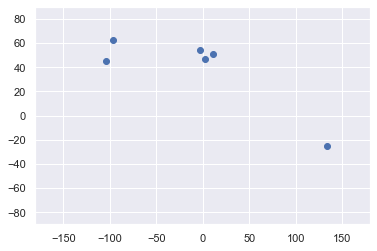

In [27]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Select the Features

In [28]:
x= data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clutstering

In [46]:
kmeans = KMeans(3)

In [47]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### This 2 lines of code will apply k-means clustering with 2 clusters to x.

## Clustering Results

In [31]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 1, 1, 1, 0])

In [32]:
clusterDataTable = data.copy()
clusterDataTable['Clusters'] = identified_clusters
clusterDataTable

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


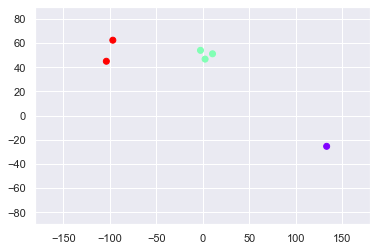

In [33]:
plt.scatter(clusterDataTable['Longitude'],clusterDataTable['Latitude'], c=clusterDataTable['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Clustering Categorical Data

In [34]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Select the Features

In [52]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


### Clustering

In [53]:
kmeans1 = KMeans(3)
kmeans1.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clutstering result

In [54]:
idnt_clusters = kmeans1.fit_predict(x)
idnt_clusters

array([2, 2, 0, 0, 0, 1])

In [55]:
df_cluster = data_mapped.copy()
df_cluster['Cluster'] = idnt_clusters
df_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,2
1,Canada,62.40,-96.80,0,2
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


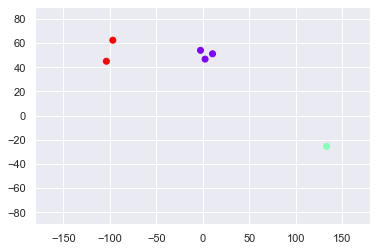

In [56]:
plt.scatter(df_cluster['Longitude'],df_cluster['Latitude'], c=df_cluster['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selecting The number of Results

### WCSS

In [57]:
kmeans1.inertia_

290.10523333333333

In [58]:
wcss = []

#For 6 observations
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [59]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

### The Elbow Method

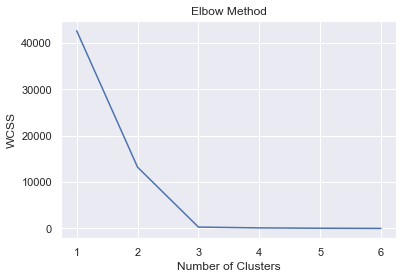

In [60]:
num_clusters = range(1,7)
plt.plot(num_clusters, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

### Based on the graph there are 2 points that can be chosed as optimal number of clusters which are 2, and 3
#### note that after 3, there would not be any much gain, so it is the best number of clusters.

# Market Segmentation Example

In [63]:
df = pd.read_csv("Market Segmentation.csv")
df.head(4)

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29


## Plot the Data

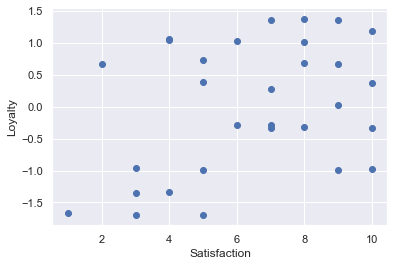

In [66]:
plt.scatter(df['Satisfaction'], df['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Select The Features

In [67]:
x = df.copy()

## Clustering

In [68]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering Result

In [73]:
x['Clusters_pred'] = kmeans.fit_predict(x) 
x.head(4)

,Satisfaction,Loyalty,Clusters_pred
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0


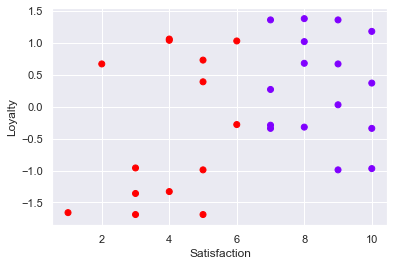

In [75]:
plt.scatter(x['Satisfaction'], x['Loyalty'], c = x['Clusters_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Standardize the Variables

In [83]:
# from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
# sklearn.preprocessing.scale(x) scales (standardizes with mean 0, std. dev of 1 by default) each variable (column) seperately

In [82]:
x_scaled

array([[-0.93138063, -1.3318111 ,  1.06904497],
       [-0.15523011, -0.28117124,  1.06904497],
       [-0.54330537, -0.99160391,  1.06904497],
       [ 0.23284516, -0.29117733, -0.93541435],
       [-0.93138063,  1.05964534,  1.06904497],
       [-2.09560642, -1.6620122 ,  1.06904497],
       [ 1.39707095, -0.97159172, -0.93541435],
       [ 0.62092042, -0.32119561, -0.93541435],
       [ 0.62092042,  1.01962097, -0.93541435],
       [ 0.62092042,  0.67941378, -0.93541435],
       [ 1.39707095, -0.3412078 , -0.93541435],
       [-0.54330537,  0.38923705,  1.06904497],
       [-0.54330537, -1.69203048,  1.06904497],
       [-1.70753116,  0.66940768,  1.06904497],
       [ 0.23284516,  0.26916393, -0.93541435],
       [ 1.00899568,  1.35982816, -0.93541435],
       [ 0.62092042,  1.37984035, -0.93541435],
       [ 0.23284516,  1.35982816, -0.93541435],
       [ 0.23284516, -0.3412078 , -0.93541435],
       [ 1.00899568,  0.66940768, -0.93541435],
       [ 1.39707095,  1.17971847, -0.935

### Take Advantage of Elbow Method

In [84]:
kmeans.inertia_

74.54254375000001

In [91]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[89.99999999999999,
 33.80381878635423,
 18.450179051702854,
 10.882052589855041,
 8.991734797399229,
 7.308251418164363,
 6.177264545748352,
 5.1759693012362735,
 4.421370645716508]

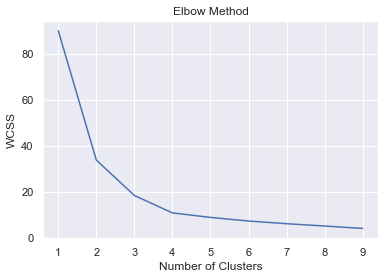

In [89]:
num_clusters = range(1,10)
plt.plot(num_clusters, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

## Explore Clustering Solutions and Select the # of Clusters

In [92]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
new_table = df.copy()
new_table['Cluster_Pred'] = kmeans_new.fit_predict(x_scaled)
new_table

,Satisfaction,Loyalty,Cluster_Pred
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,0
9,8,0.68,0


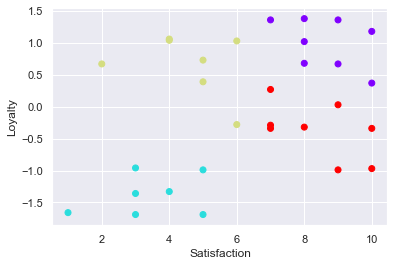

In [95]:
plt.scatter(new_table['Satisfaction'], new_table['Loyalty'], c = new_table['Cluster_Pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

##### Light blue: This group we call them Alienated (Low Satisfaction and Low Loyalty).
##### Light Green: This group we call them Supporter (Low Satisfaction and High Loyalty).
##### Red: This group we call them Roamers (High Satisfaction and Low Loyalty).
##### Purple: This Group we call them Fans (High Satisfaction and High Loyalty).

# Heatmap and Dendograms

In [109]:
dff = pd.read_csv("Standardize Country Clusters.csv", index_col = 'Country')
dff

,Latitude,Longitude,Language
Country,,,
USA,0.204344,-1.193114,English
Canada,0.798128,-1.104870,English
France,0.264983,0.151062,French
UK,0.512308,0.088645,English
Germany,0.414877,0.252347,German
Australia,-2.194639,1.805930,English


In [110]:
x_scaled = dff.copy()
x_scaled = x_scaled.drop(['Language'], axis =1)
x_scaled

,Latitude,Longitude
Country,,
USA,0.204344,-1.193114
Canada,0.798128,-1.104870
France,0.264983,0.151062
UK,0.512308,0.088645
Germany,0.414877,0.252347
Australia,-2.194639,1.805930


### Plot the data

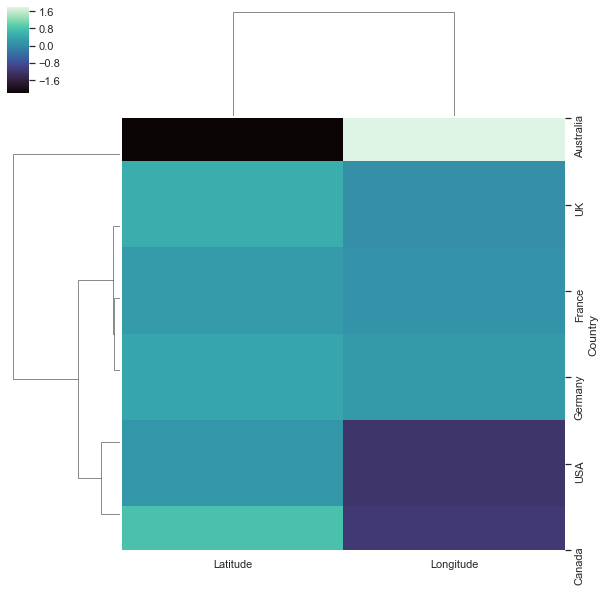

In [112]:
sns.clustermap(x_scaled, cmap='mako')